In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [3]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerState', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerState    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [4]:
df.head()

,State,Status,CustomerState,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [5]:
df.to_excel('Lesson3.xlsx', index=False)
print ('Done')

Done


In [7]:
location = r'/Users/Ignat/Documents/Dev/YandexCourse/Lesson3.xlsx'

df = pd.read_excel(location, 0, index_col='StatusDate')
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 2009-01-05 to 2012-12-31
Data columns (total 3 columns):
State            836 non-null object
Status           836 non-null int64
CustomerState    836 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.1+ KB


State            object
Status            int64
CustomerState     int64
dtype: object

In [8]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [9]:
df.head()

,State,Status,CustomerState
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [10]:
df['State'].unique()

array([u'GA', u'FL', u'fl', u'TX', u'NY', u'NJ'], dtype=object)

In [11]:
df['State'] = df.State.apply(lambda x: x.upper())

In [12]:
df['State'].unique()

array([u'GA', u'FL', u'TX', u'NY', u'NJ'], dtype=object)

In [13]:
mask = df['Status'] == 1
df = df[mask]

In [14]:
df.head()

,State,Status,CustomerState
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


In [15]:
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [16]:
df['State'].unique()

array([u'GA', u'FL', u'NY', u'TX'], dtype=object)

In [17]:
df['CustomerCount'].plot(figsize=(15,5));

KeyError: 'CustomerCount'

In [18]:
df.rename(index=str, columns={'CustomerState': 'CustomerCount'})

,State,Status,CustomerCount
StatusDate,,,
2009-01-05 00:00:00,GA,1,877
2009-01-12 00:00:00,FL,1,901
2009-02-02 00:00:00,GA,1,300
2009-03-09 00:00:00,NY,1,992
2009-04-06 00:00:00,FL,1,291
2009-04-27 00:00:00,NY,1,753
2009-05-25 00:00:00,TX,1,46
2009-07-06 00:00:00,FL,1,723
2009-07-20 00:00:00,FL,1,710


In [20]:
df['CustomerCount'].plot(figsize=(15,5))

KeyError: 'CustomerCount'

In [21]:
df.head()

,State,Status,CustomerState
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


In [24]:
df.rename(columns={'CustomerState': 'CustomerCount'}, inplace=True)

In [25]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


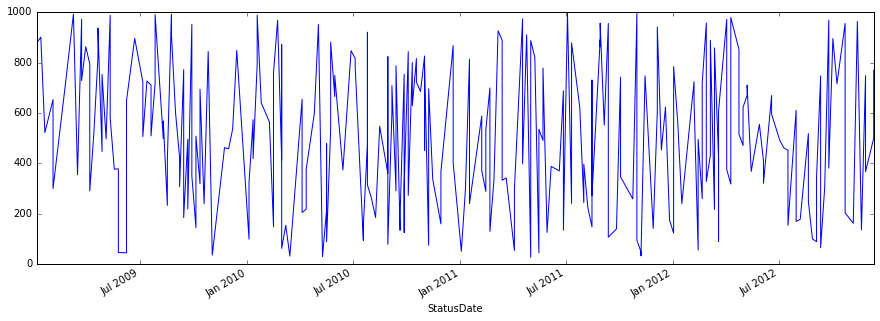

In [26]:
df['CustomerCount'].plot(figsize=(15,5))

In [27]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [28]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Status</th>
      <th>CustomerCount</th>
    </tr>
    <tr>
      <th>State</th>
      <th>StatusDate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">FL</th>
      <th>2009-01-12</th>
      <td>1</td>
      <td>901</td>
    </tr>
    <tr>
      <th>2009-02-02</th>
      <td>1</td>
      <td>653</td>
    </tr>
    <tr>
      <th>2009-03-23</th>
      <td>1</td>
      <td>752</td>
    </tr>
    <tr>
      <th>2009-04-06</th>
      <td>2</td>
      <td>1086</td>
    </tr>
    <tr>
      <th>2009-06-08</th>
      <td>1</td>
      <td>649</td>
    </tr>
  </tbody>
</table>
</div>

In [29]:
del Daily['Status']
Daily.head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>CustomerCount</th>
    </tr>
    <tr>
      <th>State</th>
      <th>StatusDate</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">FL</th>
      <th>2009-01-12</th>
      <td>901</td>
    </tr>
    <tr>
      <th>2009-02-02</th>
      <td>653</td>
    </tr>
    <tr>
      <th>2009-03-23</th>
      <td>752</td>
    </tr>
    <tr>
      <th>2009-04-06</th>
      <td>1086</td>
    </tr>
    <tr>
      <th>2009-06-08</th>
      <td>649</td>
    </tr>
  </tbody>
</table>
</div>

In [30]:
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-

In [31]:
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

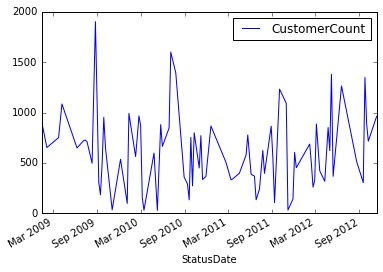

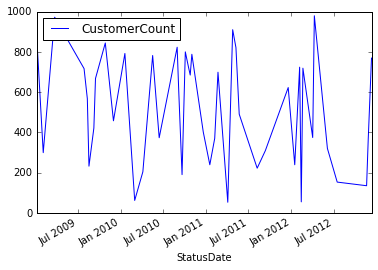

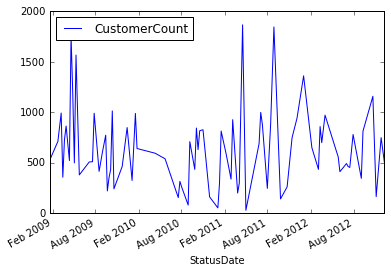

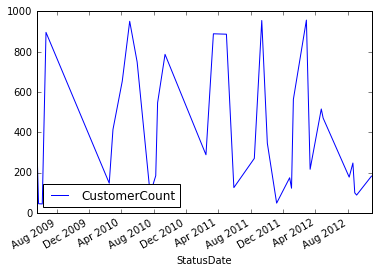

In [32]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

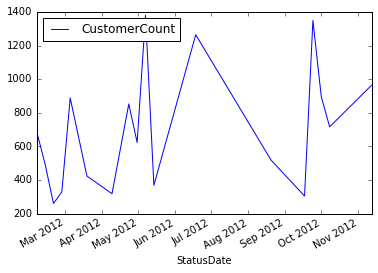

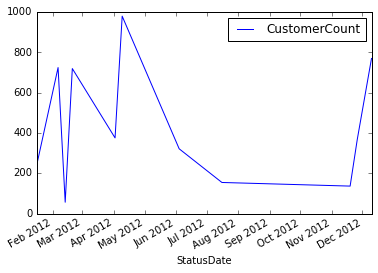

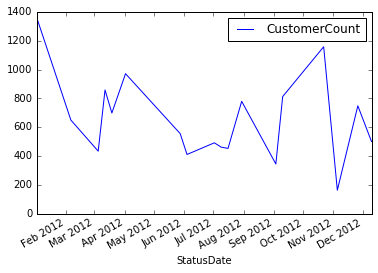

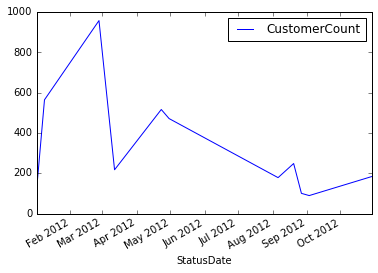

In [33]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();